In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Загрузка набора данных Fashion MNIST из OpenML
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)

# Получение данных и меток
X, y = fashion_mnist['data'], fashion_mnist['target']

# Разделение данных на обучающие (60000) и тестовые (10000) наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, train_size=60000, random_state=42)

# Вывод информации о форме обучающих и тестовых данных
print("Форма обучающих данных:", X_train.shape)
print("Форма обучающих меток:", y_train.shape)
print("Форма тестовых данных:", X_test.shape)
print("Форма тестовых меток:", y_test.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Форма обучающих данных: (60000, 784)
Форма обучающих меток: (60000,)
Форма тестовых данных: (10000, 784)
Форма тестовых меток: (10000,)


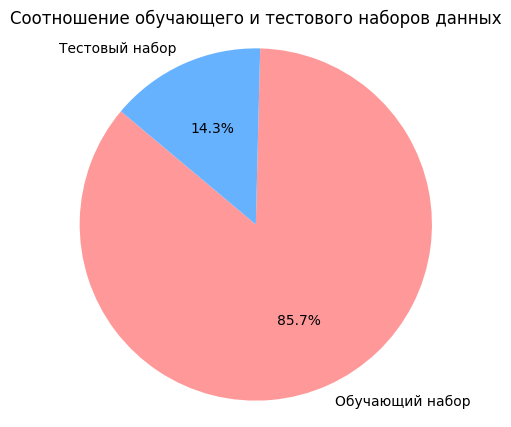

In [ ]:
import matplotlib.pyplot as plt

# Размеры обучающего и тестового наборов данных
train_size = len(y_train)
test_size = len(y_test)

# Данные для круговой диаграммы
sizes = [train_size, test_size]
labels = ['Обучающий набор', 'Тестовый набор']
colors = ['#FF9999', '#66B2FF']

# Построение круговой диаграммы
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Оставляем диаграмму круглой

# Отображение диаграммы
plt.title('Соотношение обучающего и тестового наборов данных')
plt.show()


In [ ]:
def normalize_data(data):
    return data / 255.0

# Нормализация обучающих данных
X_train_normalized = normalize_data(X_train)

# Нормализация тестовых данных
X_test_normalized = normalize_data(X_test)


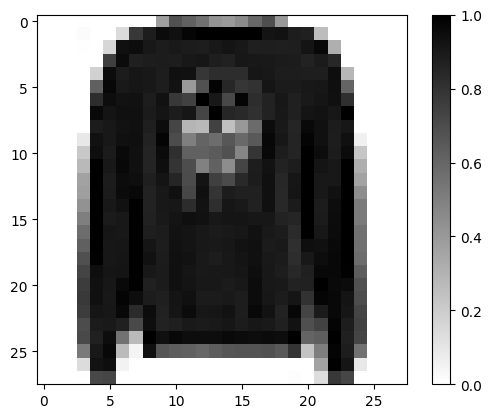

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_image(image):
    plt.figure()
    plt.imshow(image, cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()

# Берем единственное изображение из нормализованных тестовых данных
image = X_test_normalized.iloc[160].to_numpy().reshape((28, 28))
show_image(image)

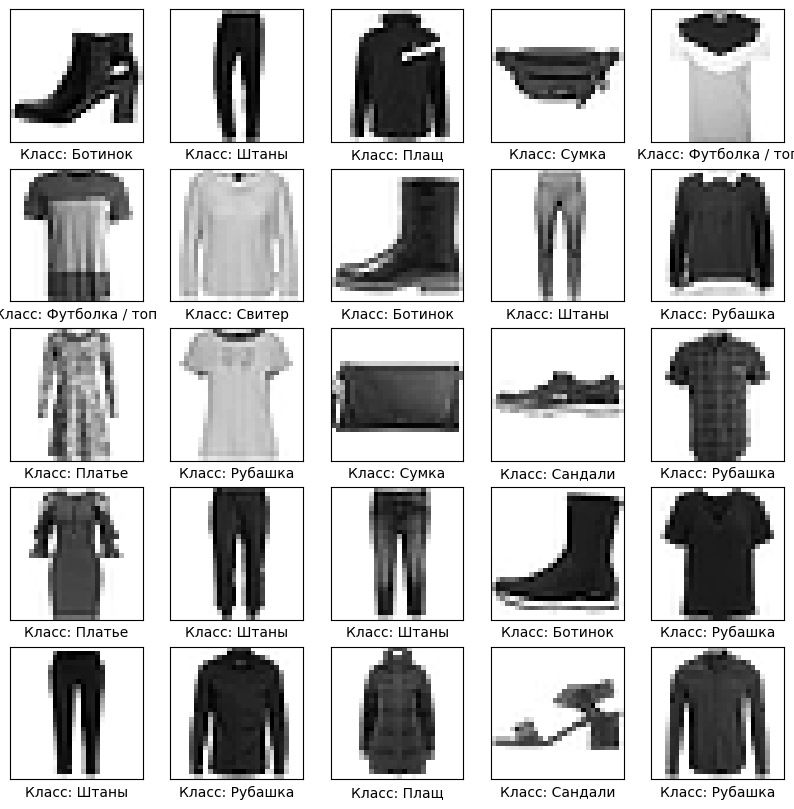

In [ ]:
# Отобразим первые 25 изображений из тренировочного набора данных
class_names = ['Футболка / топ', "Штаны", "Свитер", "Платье", "Плащ",
               "Сандали", "Рубашка", "Кроссовок", "Сумка", "Ботинок"]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = X_train_normalized.iloc[i].to_numpy().reshape((28, 28))
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(f'Класс: {class_names[int(y_train.iloc[i])]}')

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Преобразуем данные в одномерный массив для обучения модели
X_train_flattened = X_train_normalized.values.reshape(X_train_normalized.shape[0], -1)
X_test_flattened = X_test_normalized.values.reshape(X_test_normalized.shape[0], -1)

# Разделим данные на обучающий и тестовый наборы
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_flattened, y_train, test_size=0.2, random_state=42)

# Создадим модель Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучим модель на обучающем наборе данных
rf_model.fit(X_train_split, y_train_split)

# Сделаем предсказания на валидационном наборе данных
y_pred = rf_model.predict(X_val_split)

# Оценим производительность модели
accuracy = accuracy_score(y_val_split, y_pred)
print(f'Точность модели Random Forest: {accuracy}')


Точность модели Random Forest: 0.8835


In [ ]:
# Сделаем предсказания на тестовом наборе данных
y_test_pred = rf_model.predict(X_test_flattened)

# Оценим производительность модели на тестовом наборе данных
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Точность модели Random Forest на тестовом наборе данных: {test_accuracy}')


Точность модели Random Forest на тестовом наборе данных: 0.8813


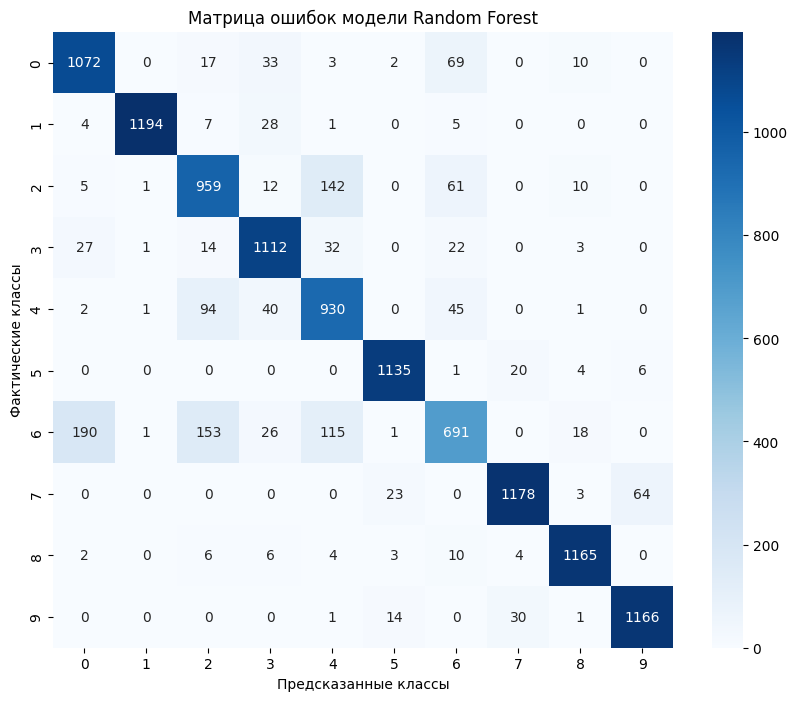

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Получим матрицу ошибок
conf_matrix = confusion_matrix(y_val_split, y_pred)

# Визуализируем матрицу ошибок с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные классы')
plt.ylabel('Фактические классы')
plt.title('Матрица ошибок модели Random Forest')
plt.show()


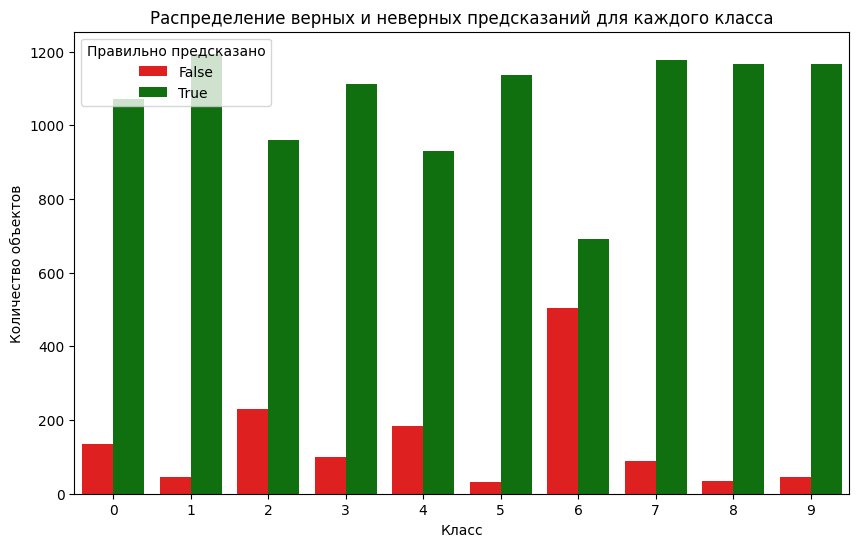

In [ ]:
# Создадим DataFrame с исходными метками классов и предсказанными метками классов
import pandas as pd
results_df = pd.DataFrame({'Actual': y_val_split, 'Predicted': y_pred})

# Добавим столбец для указания правильно или неправильно классифицированных объектов
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

# Построим график распределения верных и неверных предсказаний для каждого класса
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Correct', data=results_df, palette={True: 'green', False: 'red'})
plt.xlabel('Класс')
plt.ylabel('Количество объектов')
plt.title('Распределение верных и неверных предсказаний для каждого класса')
plt.legend(title='Правильно предсказано')
plt.show()
